1. What is Deep Learning? How did it evolve and differ from traditional ML?

Answer: Deep Learning is a subset of ML using multi‑layer neural networks to learn complex patterns. It evolved from early perceptrons and backpropagation to modern GPU‑powered deep nets. Unlike traditional ML, it learns features automatically instead of relying on manual feature engineering.

2. Explain the basic architecture and functioning of a Perceptron. What are its limitations?

Answer: A perceptron takes inputs, multiplies by weights, adds bias, and passes through an activation to produce output. It can only solve linearly separable problems and fails on non‑linear tasks like XOR.

3. Describe the purpose of activation function in neural networks. Compare Sigmoid, ReLU, and Tanh.

Answer: Activation functions add non‑linearity so networks can learn complex relationships.

Sigmoid: Range (0,1), interpretable as probability, but suffers vanishing gradient.

Tanh: Range (-1,1), zero‑centered, but still vanishing gradient.

ReLU: Range [0,∞), fast and widely used, but can cause “dying ReLU.”

4. What is the difference between Loss function and Cost function in neural networks?

Answer: Loss function measures error for a single sample (e.g., squared error). Cost function aggregates/averages loss across the dataset (e.g., Mean Squared Error). Loss = individual error, Cost = overall optimization target.

5. What is the role of optimizers in neural networks? Compare Gradient Descent, Adam, and RMSprop.

Answer: Optimizers update weights to minimize the cost function.

Gradient Descent: Simple, but slow and sensitive to learning rate.

Adam: Combines momentum + adaptive learning rates, fast and robust.

RMSprop: Adjusts learning rate using squared gradients, good for RNNs, needs tuning.

In [1]:
# 6. Write a Python program to implement a single-layer perceptron from scratch using NumPy to solve the logical AND gate.

import numpy as np

# Training data for AND gate
# Inputs: [x1, x2], Outputs: x1 AND x2
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
y = np.array([[0],
              [0],
              [0],
              [1]])

# Initialize weights and bias
np.random.seed(42)
weights = np.random.rand(2,1)   # two inputs → one output
bias = np.random.rand(1)

# Learning rate
lr = 0.1

# Activation function (step function)
def step_function(x):
    return np.where(x >= 0, 1, 0)

# Training loop
epochs = 20
for epoch in range(epochs):
    for i in range(len(X)):
        # Forward pass
        linear_output = np.dot(X[i], weights) + bias
        y_pred = step_function(linear_output)

        # Error
        error = y[i] - y_pred

        # Weight update
        weights += lr * error * X[i].reshape(2,1)
        bias += lr * error

    # Print progress
    print(f"Epoch {epoch+1}: Weights={weights.ravel()}, Bias={bias}")

# Testing
print("\nTesting perceptron on AND gate:")
for i in range(len(X)):
    linear_output = np.dot(X[i], weights) + bias
    y_pred = step_function(linear_output)
    print(f"Input: {X[i]} → Predicted: {y_pred[0]} | Expected: {y[i][0]}")


Epoch 1: Weights=[0.27454012 0.85071431], Bias=[0.43199394]
Epoch 2: Weights=[0.17454012 0.75071431], Bias=[0.13199394]
Epoch 3: Weights=[0.07454012 0.65071431], Bias=[-0.16800606]
Epoch 4: Weights=[0.07454012 0.55071431], Bias=[-0.26800606]
Epoch 5: Weights=[0.07454012 0.45071431], Bias=[-0.36800606]
Epoch 6: Weights=[0.17454012 0.45071431], Bias=[-0.36800606]
Epoch 7: Weights=[0.17454012 0.35071431], Bias=[-0.46800606]
Epoch 8: Weights=[0.17454012 0.35071431], Bias=[-0.46800606]
Epoch 9: Weights=[0.17454012 0.35071431], Bias=[-0.46800606]
Epoch 10: Weights=[0.17454012 0.35071431], Bias=[-0.46800606]
Epoch 11: Weights=[0.17454012 0.35071431], Bias=[-0.46800606]
Epoch 12: Weights=[0.17454012 0.35071431], Bias=[-0.46800606]
Epoch 13: Weights=[0.17454012 0.35071431], Bias=[-0.46800606]
Epoch 14: Weights=[0.17454012 0.35071431], Bias=[-0.46800606]
Epoch 15: Weights=[0.17454012 0.35071431], Bias=[-0.46800606]
Epoch 16: Weights=[0.17454012 0.35071431], Bias=[-0.46800606]
Epoch 17: Weights=[

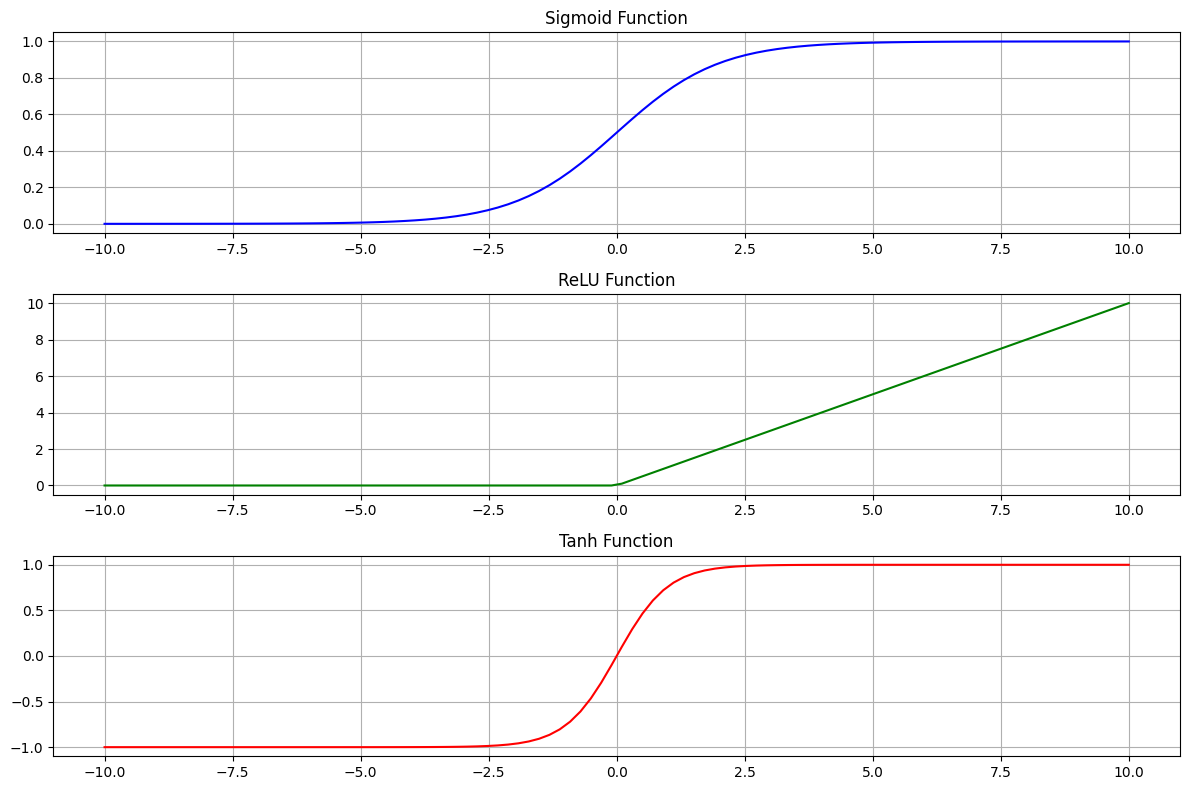

In [2]:
# 7. Implement and visualize Sigmoid, ReLU, and Tanh activation functions using Matplotlib.

import numpy as np
import matplotlib.pyplot as plt

# Define activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

# Input range
x = np.linspace(-10, 10, 100)

# Compute outputs
y_sigmoid = sigmoid(x)
y_relu = relu(x)
y_tanh = tanh(x)

# Plot all activation functions
plt.figure(figsize=(12, 8))

# Sigmoid
plt.subplot(3, 1, 1)
plt.plot(x, y_sigmoid, color='blue')
plt.title("Sigmoid Function")
plt.grid(True)

# ReLU
plt.subplot(3, 1, 2)
plt.plot(x, y_relu, color='green')
plt.title("ReLU Function")
plt.grid(True)

# Tanh
plt.subplot(3, 1, 3)
plt.plot(x, y_tanh, color='red')
plt.title("Tanh Function")
plt.grid(True)

plt.tight_layout()
plt.show()


In [3]:
# 8. Use Keras to build and train a simple multilayer neural network on the MNIST digits dataset. Print the training accuracy.

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# 1. Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 2. Normalize pixel values (0–255 → 0–1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# 3. One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# 4. Build a simple multilayer neural network
model = Sequential([
    Flatten(input_shape=(28, 28)),        # Flatten 28x28 images into 784 vector
    Dense(128, activation='relu'),        # Hidden layer
    Dense(64, activation='relu'),         # Another hidden layer
    Dense(10, activation='softmax')       # Output layer (10 classes)
])

# 5. Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 6. Train the model
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=128,
                    verbose=1)

# 7. Print training accuracy
train_acc = history.history['accuracy'][-1]
print(f"Final Training Accuracy: {train_acc:.4f}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8322 - loss: 0.6103
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9561 - loss: 0.1506
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9721 - loss: 0.0972
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9780 - loss: 0.0733
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9828 - loss: 0.0570
Final Training Accuracy: 0.9821


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7573 - loss: 0.7377 - val_accuracy: 0.8458 - val_loss: 0.4394
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8576 - loss: 0.3989 - val_accuracy: 0.8555 - val_loss: 0.4001
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8715 - loss: 0.3568 - val_accuracy: 0.8561 - val_loss: 0.3932
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8795 - loss: 0.3298 - val_accuracy: 0.8708 - val_loss: 0.3531
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8900 - loss: 0.3028 - val_accuracy: 0.8667 - val_loss: 0.3667
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8970 - loss: 0.2800 - val_accuracy: 0.8783 - val_loss: 0.3396
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6

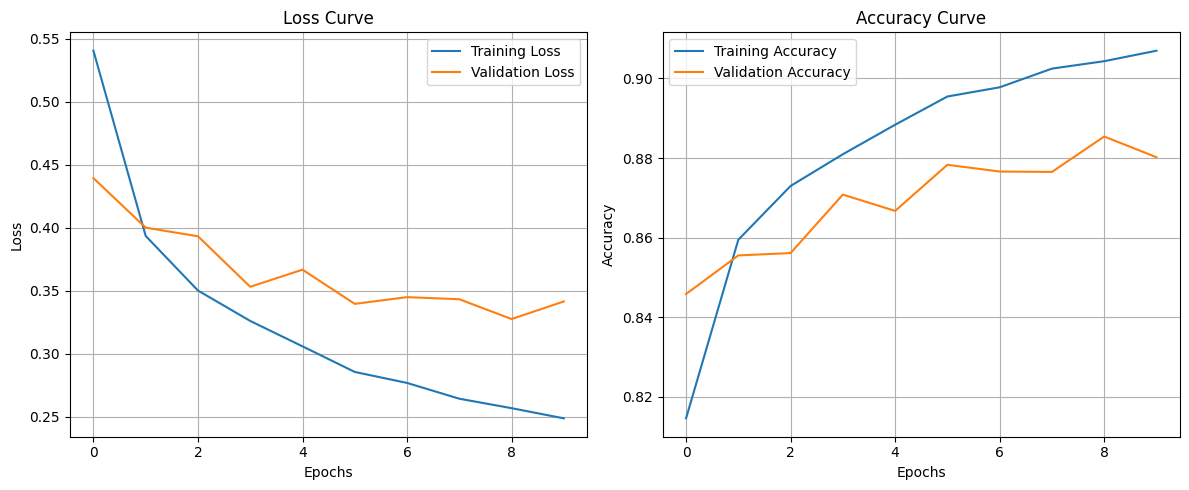

In [4]:
# 9. Visualize the loss and accuracy curves for a neural network model trained on the Fashion MNIST dataset. Interpret the training behavior.

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# 1. Load Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# 2. Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# 3. One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# 4. Build a simple neural network
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# 5. Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 6. Train the model
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(X_test, y_test),
                    verbose=1)

# 7. Plot loss and accuracy curves
plt.figure(figsize=(12,5))

# Loss curve
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

# Accuracy curve
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


 10. You are working on a project for a bank that wants to automatically detect fraudulent transactions. The dataset is large, imbalanced, and contains structured
features like transaction amount, merchant ID, and customer location. The goal is toclassify each transaction as fraudulent or legitimate.
Explain your real-time data science workflow:
● How would you design a deep learning model (perceptron or multilayer NN)?
● Which activation function and loss function would you use, and why?
● How would you train and evaluate the model, considering class imbalance?
● Which optimizer would be suitable, and how would you prevent overfitting?

Answer :  Real-time fraud detection workflow for imbalanced, structured transaction data

## Model design for tabular data
- **Input handling:**
  - **Numerical:** transaction amount, time deltas, frequency features → standardized.
  - **Categorical:** merchant ID, customer location, device → use embeddings or target encoding.
- **Architecture (multilayer NN):**
  - **Embedding layers** for high-cardinality categorical features, concatenate with scaled numerical inputs.
  - 2–3 dense blocks: Dense(128/64) → BatchNorm → ReLU → Dropout(0.2–0.4).
  - **Output:** single neuron with sigmoid for fraud probability.
- **Feature engineering:**
  - Behavioral aggregates (rolling counts/amounts per customer/merchant/time window), risk scores, velocity features, geospatial distance from usual location, transaction time-of-day, device changes.

---

## Activation and loss choices
- **Hidden layers:** ReLU (fast, stable on tabular data); consider LeakyReLU if “dying ReLU” observed.
- **Output:** Sigmoid to produce \(p(\text{fraud}) \in [0,1]\).
- **Loss:**
  - Start with **binary cross-entropy** with **class weights** reflecting imbalance.
  - Consider **focal loss** to focus on hard/rare fraud cases when extreme imbalance or noisy labels are present.

---

## Training and evaluation with class imbalance
- **Data split:**
  - Time-aware train/validation/test split (avoid leakage), stratify on label where possible.
- **Imbalance strategies:**
  - **Class weights** during training (preferred for deep nets).
  - Oversampling rare class with caution; avoid random oversampling that duplicates near-identical rows. If needed, use **SMOTE** only on numerical features offline, then train with class weights.
  - **Threshold tuning** on validation to meet business KPIs (maximize F1, or set recall ≥ target while controlling precision).
- **Metrics:**
  - **PR-AUC (precision–recall)** as primary; ROC-AUC secondary.
  - Report **precision, recall, F1**, confusion matrix, and **calibrated probabilities** (reliability curve).
  - Segment performance by merchant/customer cohorts and transaction amount buckets to catch bias.
- **Cross-validation:**
  - **Blocked time-series CV** or rolling windows to mimic production drift.
- **Monitoring drift:**
  - Track feature drift (PSI), label drift, and recalibrate or retrain periodically.

---

## Optimizer and overfitting prevention
- **Optimizer:** **Adam** (fast convergence, adaptive LR). Start with lr ≈ 1e-3; use **ReduceLROnPlateau** if validation loss plateaus.
- **Regularization:**
  - **Dropout** (0.2–0.4) in dense blocks.
  - **L2 weight decay** on dense layers.
  - **Early stopping** on validation PR-AUC or loss with patience (3–5 epochs).
  - **Batch normalization** for stability and faster training.
- **Data-centric controls:**
  - Strict **feature leakage checks** (no post-transaction features in training).
  - **Robust feature scaling** fit only on training data.
  - **Balanced mini-batches** (ensure minority class presence per batch).

---

## Real-time pipeline considerations
- **Streaming ingestion:** Kafka or message queue → real-time feature service (fetch customer/merchant aggregates precomputed in a feature store).
- **Low-latency inference:** Export model as a REST service (FastAPI/Flask) or TensorFlow Serving; use batching only if latency allows.
- **Explainability:** Log top feature contributions (e.g., SHAP on a sample, or simpler scorecards) for auditability.
- **Feedback loop:** Collect flagged transactions, human review outcomes → periodic retraining with robust validation and threshold re-optimization.
- **Fail-safes:** Conservative thresholds, rules overlay for high-risk patterns, and shadow deployment before full rollout.

---

## Quick blueprint
- **Model:** Embeddings + Dense(128,64) with ReLU, BN, Dropout → Sigmoid.
- **Loss:** Weighted binary cross-entropy; optionally focal loss.
- **Training:** Time-aware split, class weights, early stopping, ReduceLROnPlateau.
- **Evaluation:** PR-AUC, precision/recall/F1, threshold tuning, cohort analysis.
- **Deployment:** Low-latency service, monitored for drift, periodic retraining with calibrated probabilities.
